<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Build-Multivariate-Regression" data-toc-modified-id="Build-Multivariate-Regression-1">Build Multivariate Regression</a></span><ul class="toc-item"><li><span><a href="#Look-at-the-data" data-toc-modified-id="Look-at-the-data-1.1">Look at the data</a></span></li><li><span><a href="#Multivariate-Model" data-toc-modified-id="Multivariate-Model-1.2">Multivariate Model</a></span></li><li><span><a href="#Appendix-A---Model-evaluation-with-cross-validation" data-toc-modified-id="Appendix-A---Model-evaluation-with-cross-validation-1.3">Appendix A - Model evaluation with cross validation</a></span></li><li><span><a href="#Appendix-B---How-to-deal-with-skewed-data" data-toc-modified-id="Appendix-B---How-to-deal-with-skewed-data-1.4">Appendix B - How to deal with skewed data</a></span></li><li><span><a href="#Appendix-C---Choosing-the-right-features" data-toc-modified-id="Appendix-C---Choosing-the-right-features-1.5">Appendix C - Choosing the right features</a></span></li></ul></li></ul></div>

# Build Multivariate Regression

<a href="https://drive.google.com/file/d/1EZ_xqMaYj77vErVnrQmnFOj-VBEoO5uW/view" target="_blank">
     <img src="http://www.deltanalytics.org/uploads/2/6/1/4/26140521/screen-shot-2019-01-05-at-4-48-29-pm_orig.png" width="500" height="400">
</a>

The first regression we built was a univariate regression meaning we had one independent variable, which in this case was 'loan_amount'. Our linear regression demonstrated that in general, the more lenders the higher the loan amount. 

Now let's use the other variables in our data and see which ones have a strong linear relationship with loan_amount.

In [23]:
# Generally useful data science packages
import numpy as np
import pandas as pd

# Plotting package
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

# We'll be using statsmodels to fit linear regression
import statsmodels.api as sm

# Packages for checking assumptions
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Set jupyter notebook preferences
# the command below means that the output of multiple commands in a cell will be output at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# the command below tells jupyter to display up to 100 columns, this keeps everything visible
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', True)

Look at the data
----

In [24]:
# Load data

try: 
    # Local version
    path = "../data/"
    filename = 'loans.csv'
    df = pd.read_csv(path+filename)
except FileNotFoundError or ParserError: 
    # If not local, get from remote repp. Helpful if using colab.
    url = 'https://raw.githubusercontent.com/DeltaAnalytics/machine_learning_for_good_data/master/loans.csv'
    df = pd.read_csv(url)

In [25]:
df.columns.tolist()

['id_number',
 'loan_amount',
 'lender_count',
 'status',
 'funded_date',
 'funded_amount',
 'repayment_term',
 'location_country_code',
 'sector',
 'description',
 'use']

In [26]:
# look at the first 5 rows of our data
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [27]:
# let's start with a multivariate regression using the numeric variables as our independent variables
df.dtypes

id_number                 int64
loan_amount               int64
lender_count              int64
status                   object
funded_date              object
funded_amount             int64
repayment_term            int64
location_country_code    object
sector                   object
description              object
use                      object
dtype: object

Text(0.5, 1.0, 'Scatter plot of lender count vs requested loan amount')

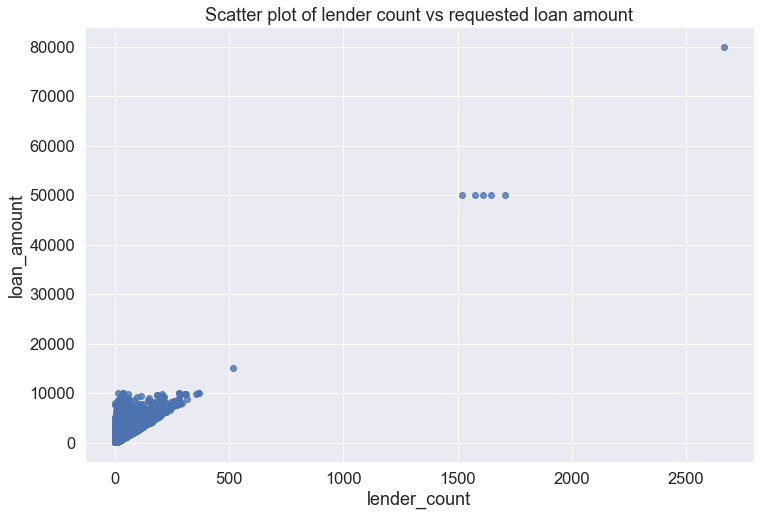

In [28]:
# plot loan amount vs. lender count
ax = sns.regplot(x='lender_count', y='loan_amount', data=df, fit_reg=False)
ax.set_title('Scatter plot of lender count vs requested loan amount')

What does the relationship between lender count and loan amount look like?  Is it linear?

<br>
<br>
<br>

Text(0.5, 1.0, 'Scatter plot of repayment term vs requested loan amount')

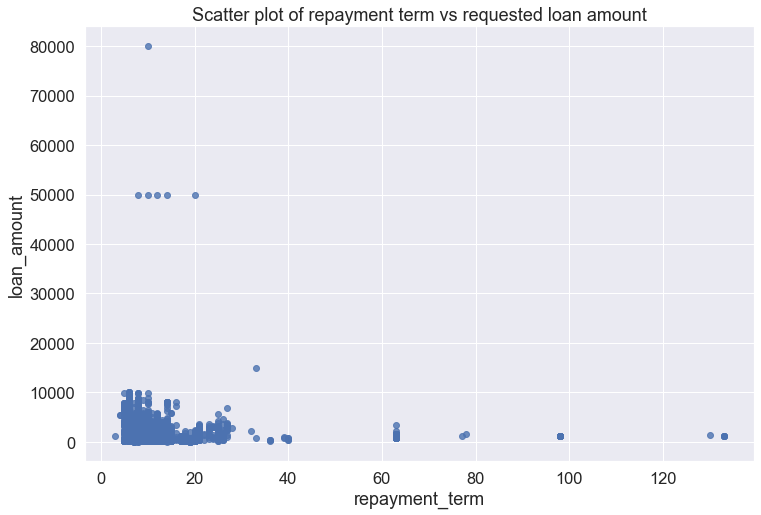

In [29]:
# plot loan amount vs. funded amount
ax = sns.regplot(x='repayment_term', y='loan_amount', data=df, fit_reg=False)
ax.set_title('Scatter plot of repayment term vs requested loan amount')

What does the relationship between repayment term and loan amount look like?  Is it linear?

<br>
<br>
<br>

Text(0.5, 1.0, 'Retail')

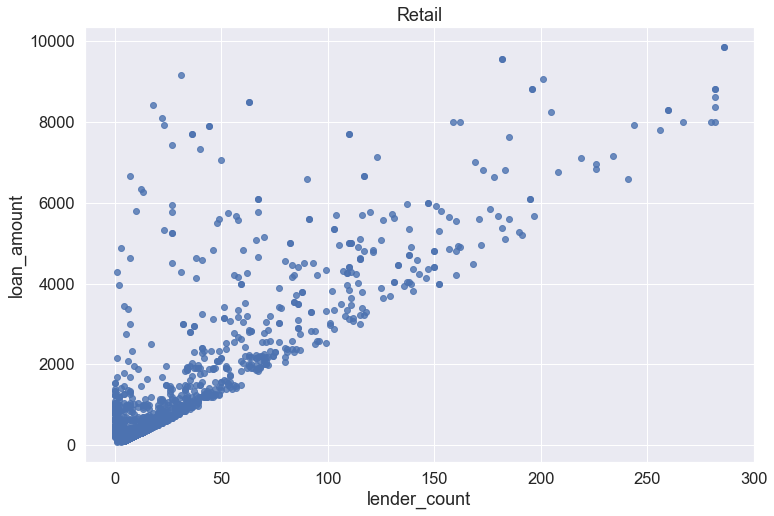

Text(0.5, 1.0, 'Food')

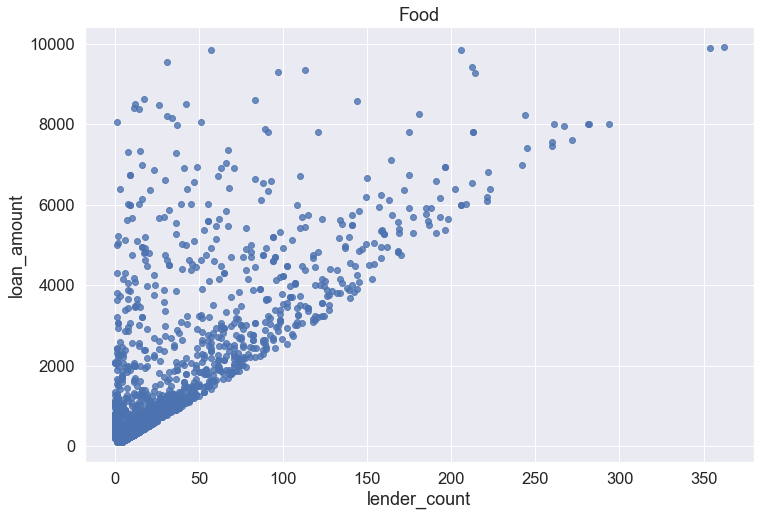

Text(0.5, 1.0, 'Services')

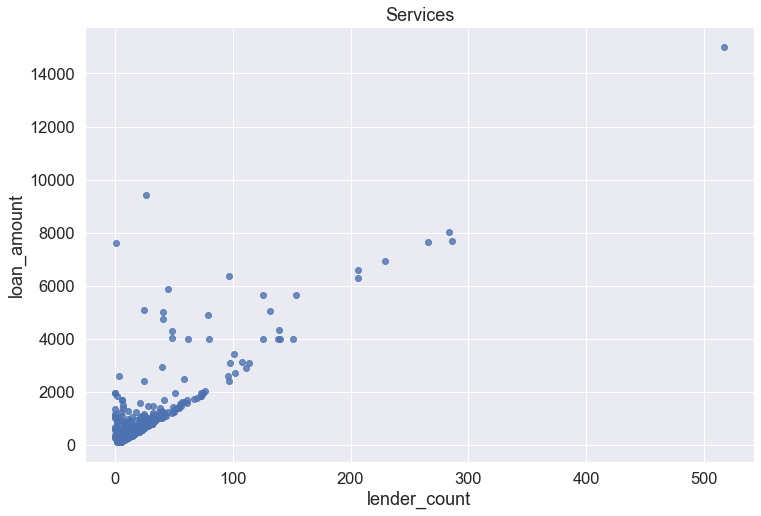

Text(0.5, 1.0, 'Clothing')

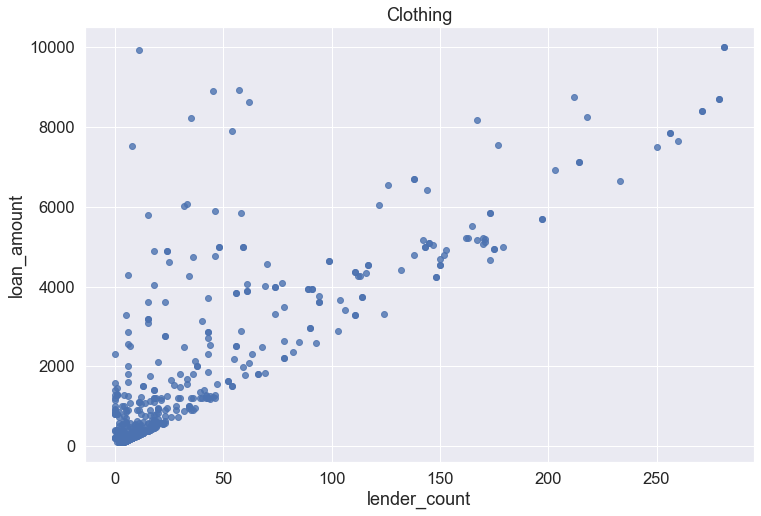

Text(0.5, 1.0, 'Arts')

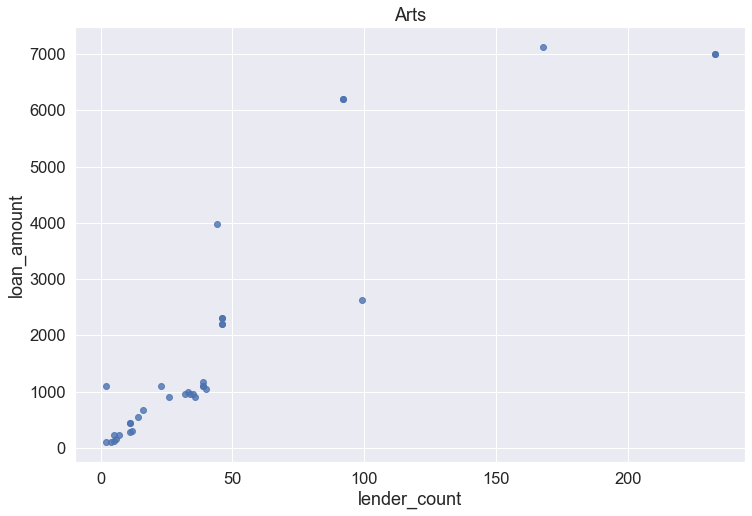

Text(0.5, 1.0, 'Agriculture')

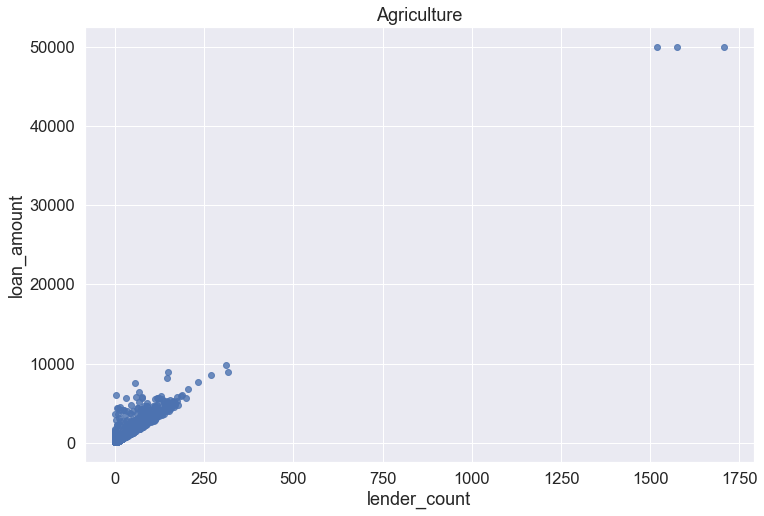

Text(0.5, 1.0, 'Manufacturing')

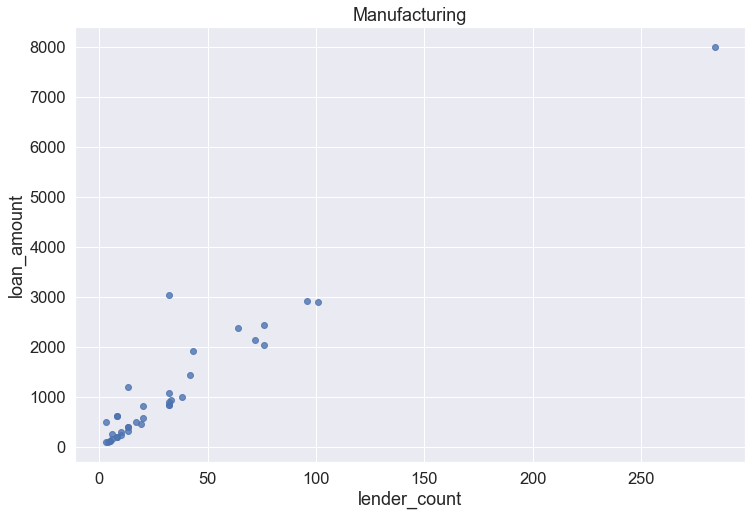

Text(0.5, 1.0, 'Construction')

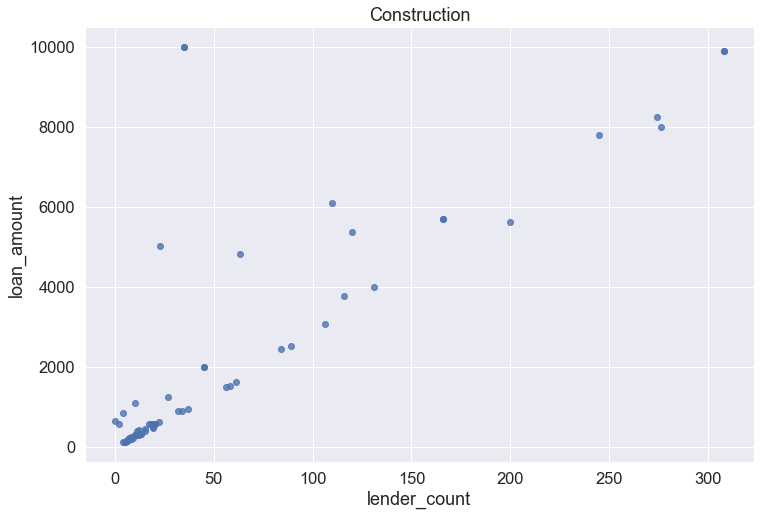

Text(0.5, 1.0, 'Wholesale')

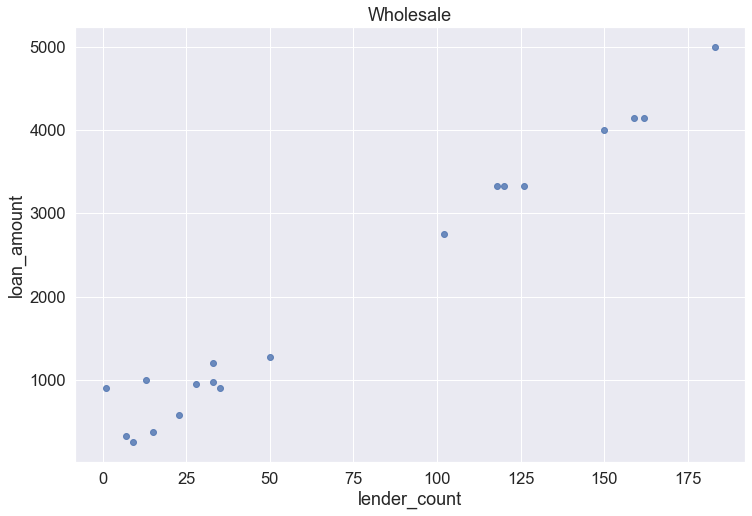

Text(0.5, 1.0, 'Health')

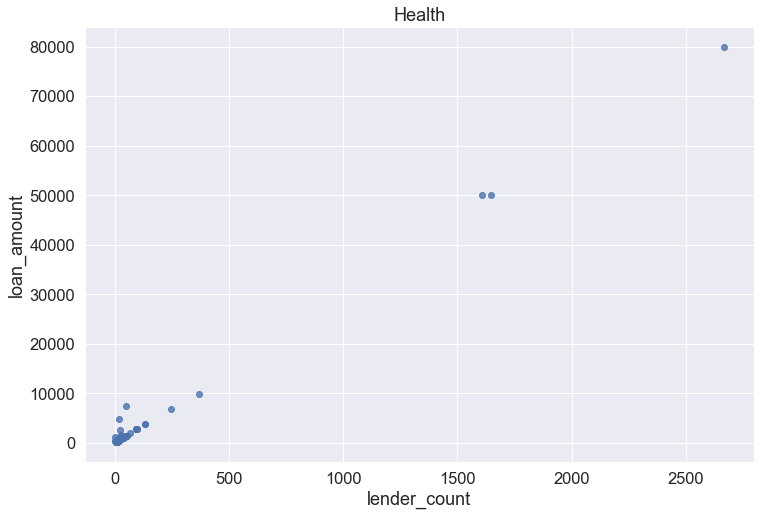

Text(0.5, 1.0, 'Transportation')

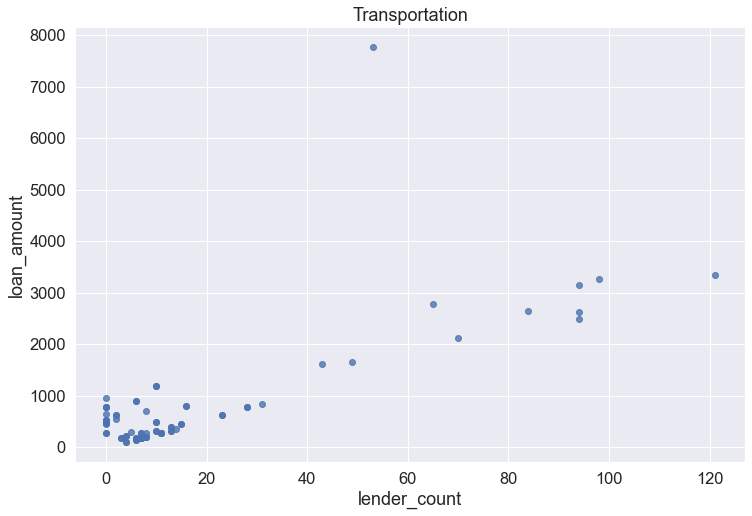

Text(0.5, 1.0, 'Education')

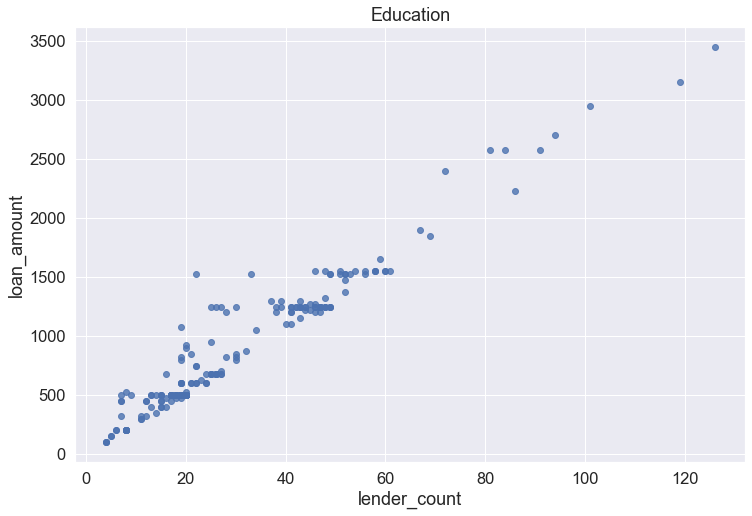

Text(0.5, 1.0, 'Housing')

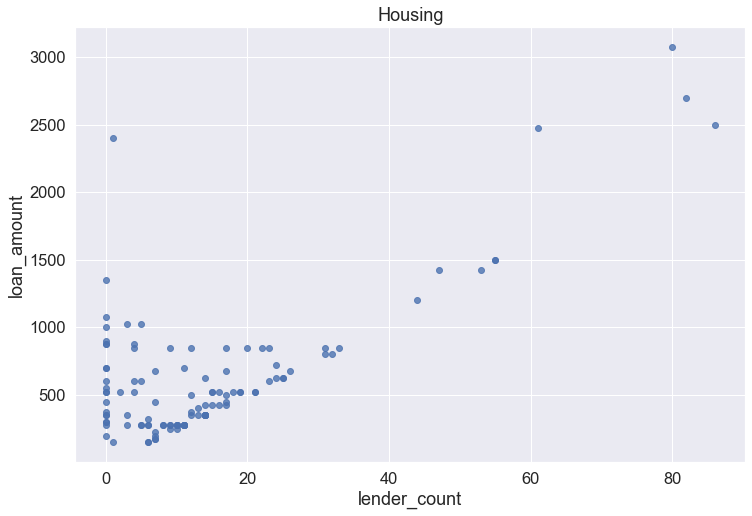

Text(0.5, 1.0, 'Personal Use')

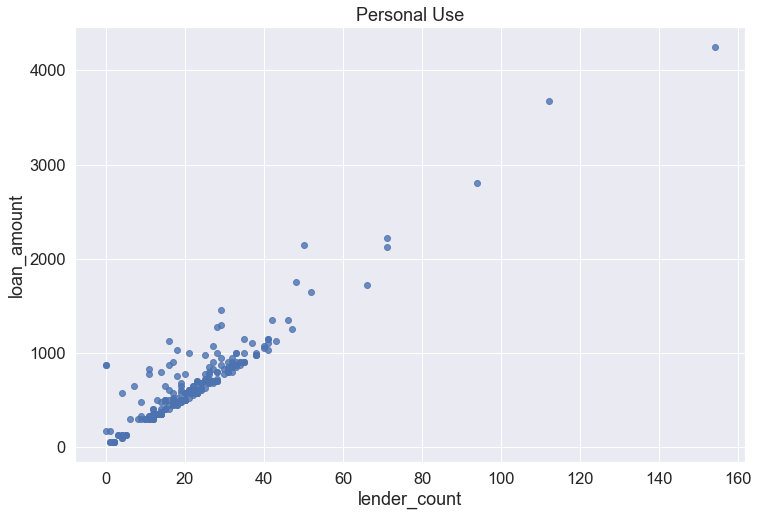

In [30]:
for sector in df['sector'].unique():
    ax = sns.regplot(x='lender_count', y='loan_amount', data=df[df['sector']==sector], fit_reg=False)
    ax.set_title(sector)
    plt.show()


Text(0.5, 1.0, 'BJ')

Text(0.5, 1.0, 'BW')

Text(0.5, 1.0, 'BF')

Text(0.5, 1.0, 'BI')

Text(0.5, 1.0, 'CM')

Text(0.5, 1.0, 'CG')

Text(0.5, 1.0, 'CD')

Text(0.5, 1.0, 'EG')

Text(0.5, 1.0, 'GH')

Text(0.5, 1.0, 'CI')

Text(0.5, 1.0, 'KE')

Text(0.5, 1.0, 'LS')

Text(0.5, 1.0, 'LR')

Text(0.5, 1.0, 'MG')

Text(0.5, 1.0, 'MW')

Text(0.5, 1.0, 'ML')

Text(0.5, 1.0, 'MR')

Text(0.5, 1.0, 'MZ')

Text(0.5, 1.0, 'nan')

Text(0.5, 1.0, 'NG')

/Users/brian/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Text(0.5, 1.0, 'RW')

Text(0.5, 1.0, 'SN')

Text(0.5, 1.0, 'SL')

Text(0.5, 1.0, 'SO')

Text(0.5, 1.0, 'ZA')

Text(0.5, 1.0, 'SS')

Text(0.5, 1.0, 'TZ')

Text(0.5, 1.0, 'TG')

Text(0.5, 1.0, 'UG')

Text(0.5, 1.0, 'ZM')

Text(0.5, 1.0, 'ZW')

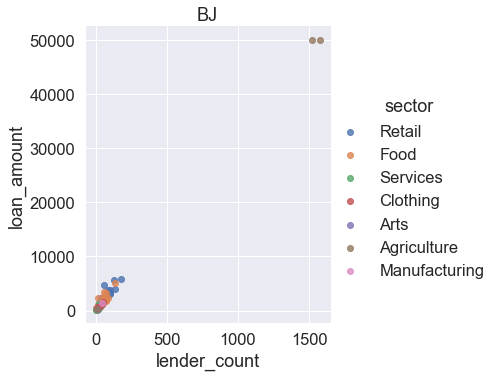

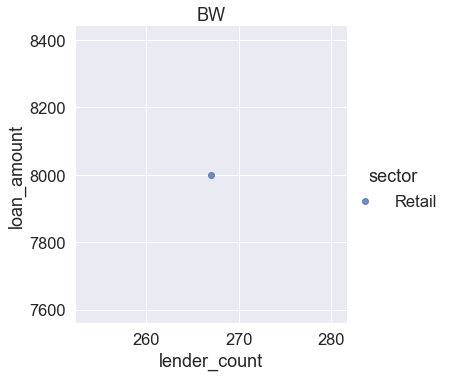

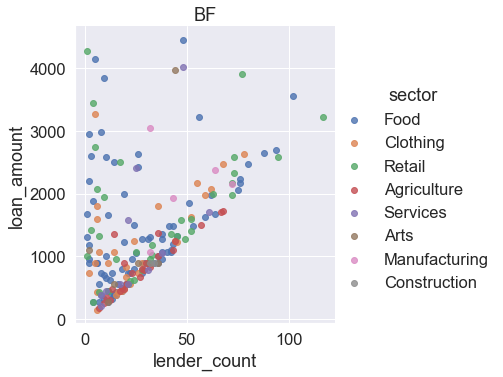

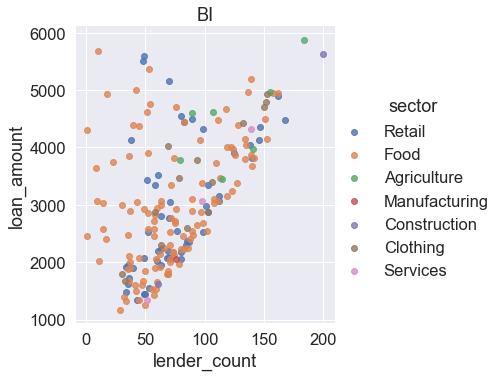

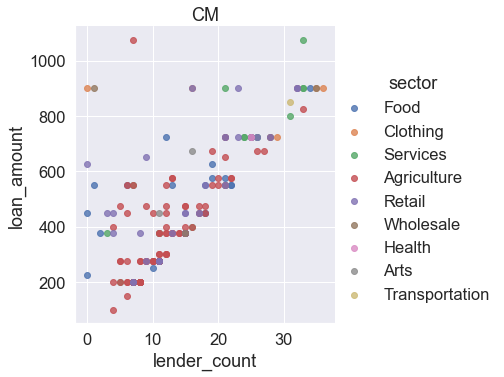

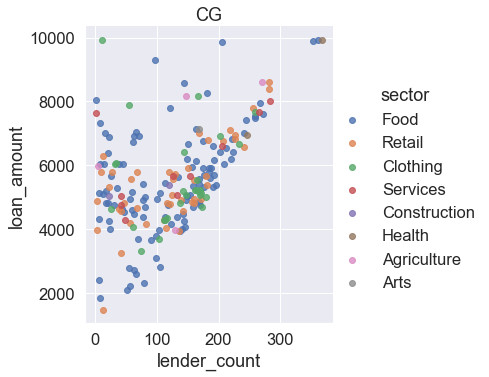

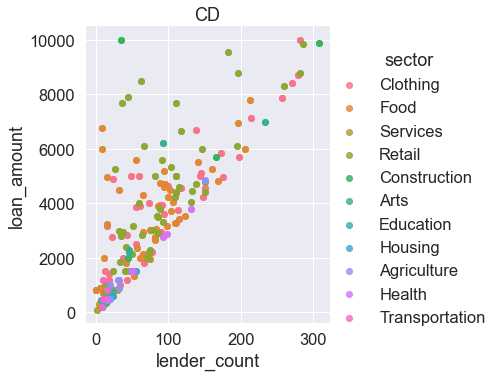

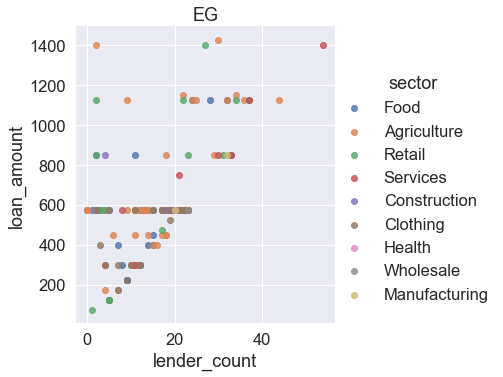

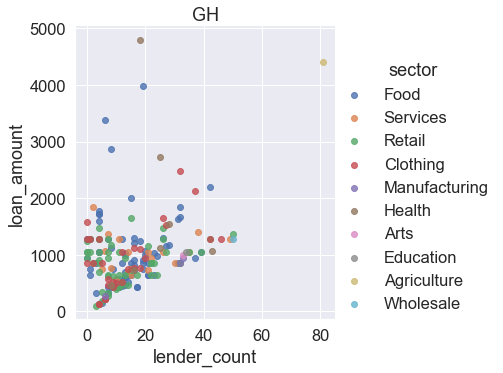

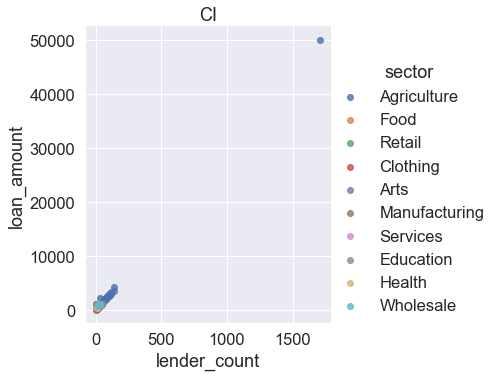

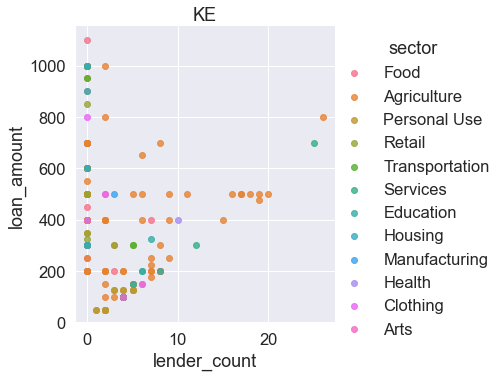

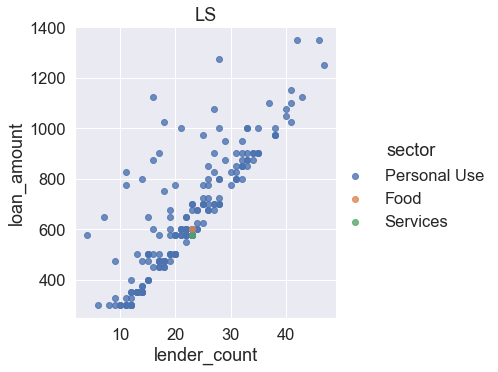

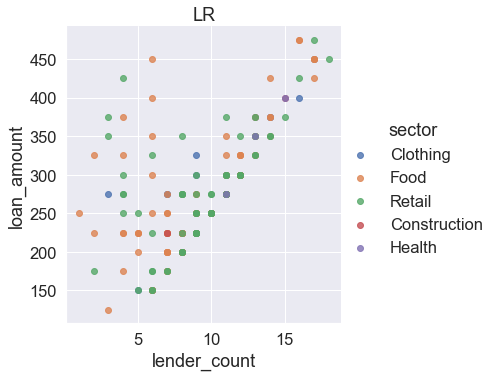

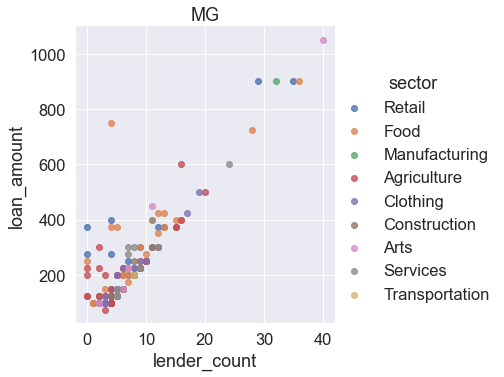

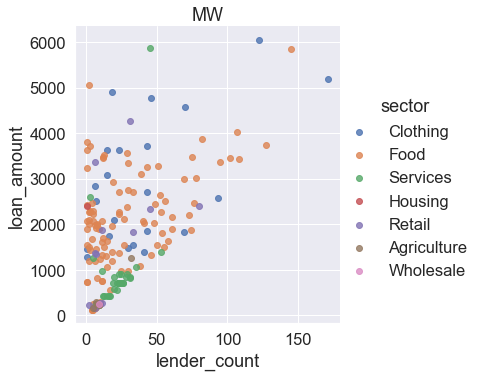

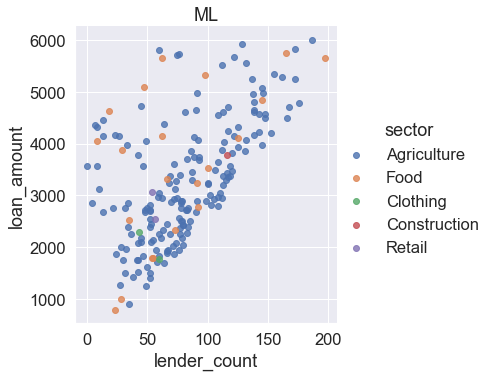

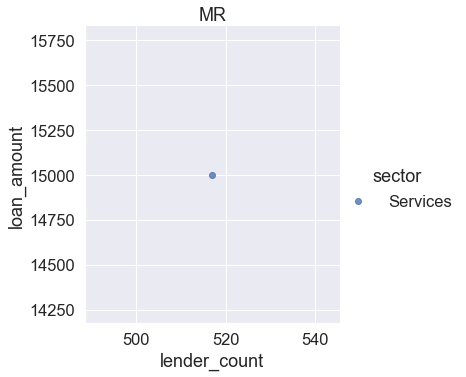

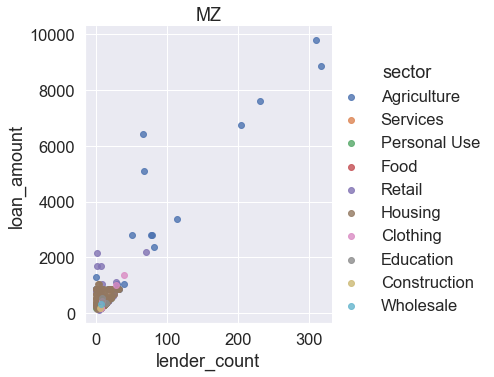

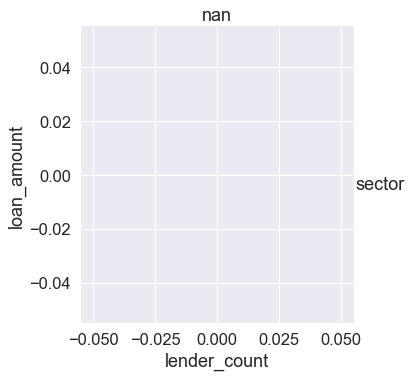

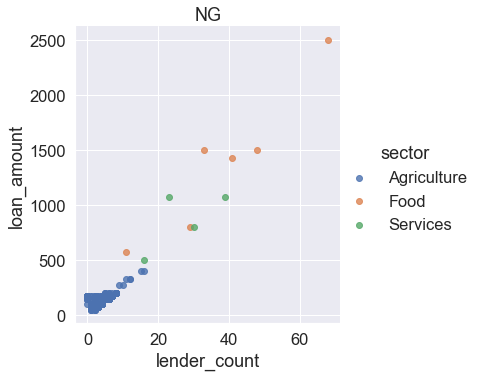

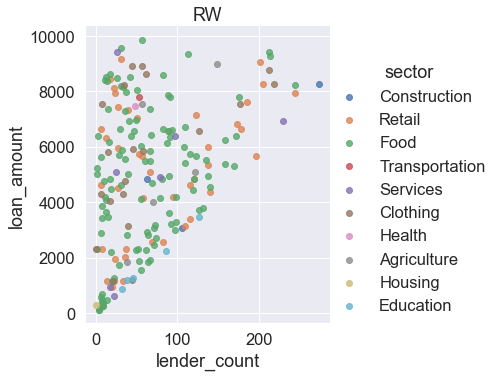

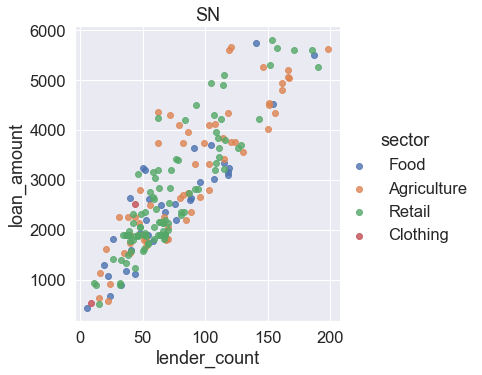

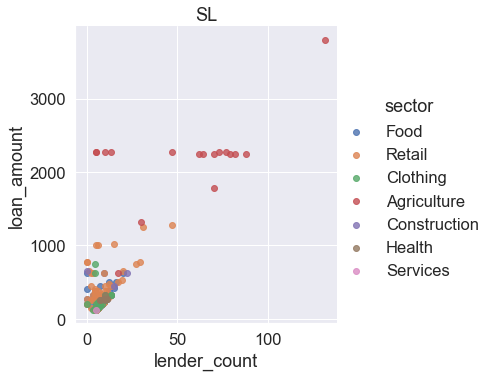

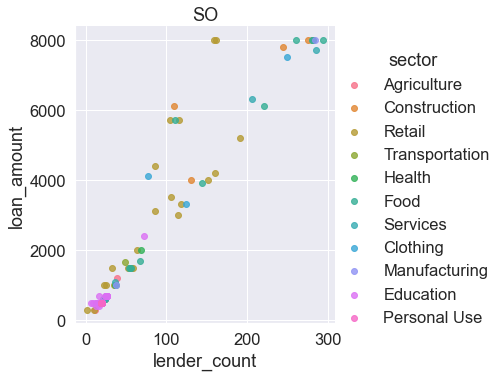

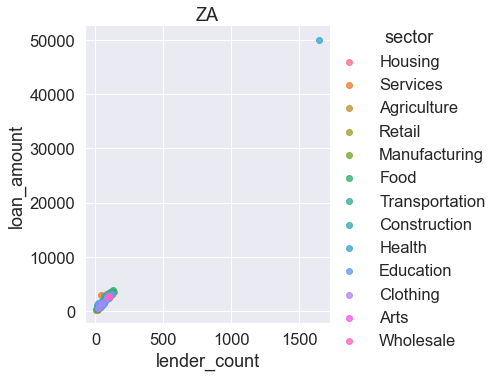

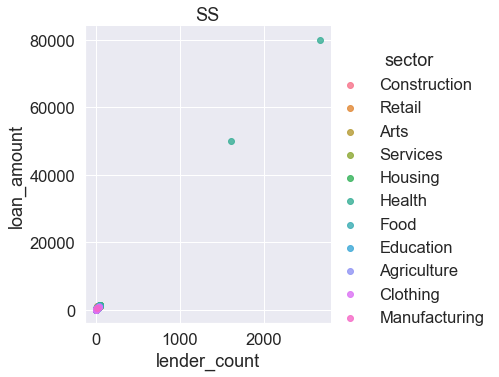

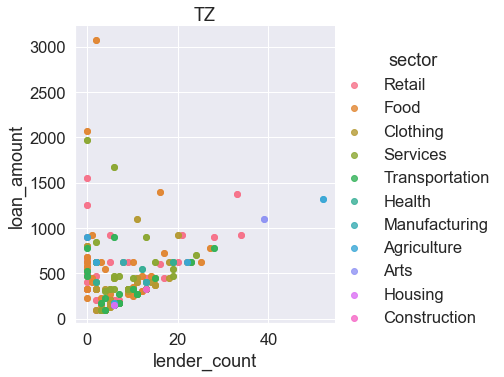

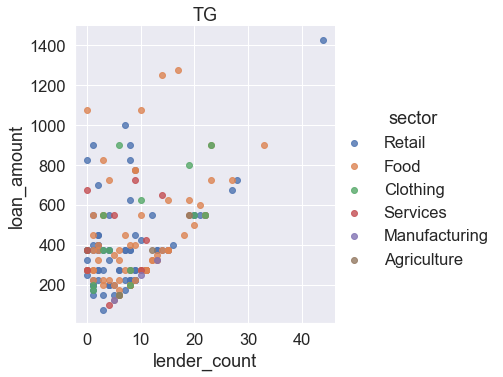

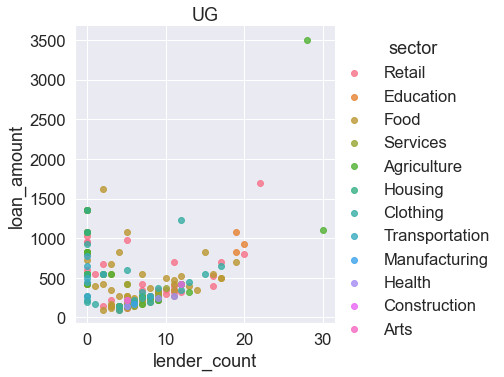

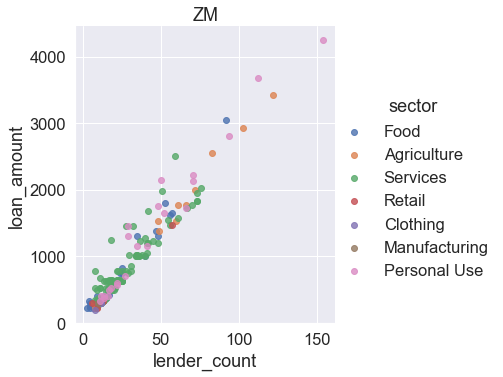

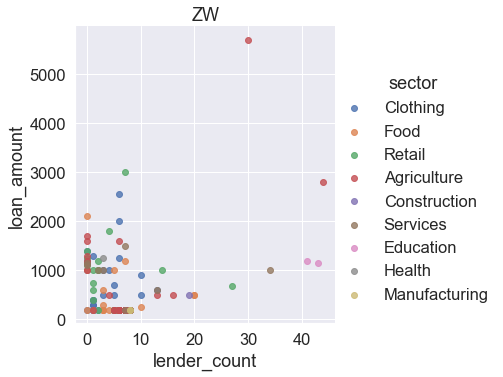

In [31]:
for country in df['location_country_code'].unique():
    ax = sns.lmplot(x='lender_count', y='loan_amount', data=df[df['location_country_code']==country], fit_reg=False,
                    hue = 'sector')
    ax = plt.gca()
    ax.set_title(country)


The linear relationship between lender_count and loan_amount is strongest for country ZM

In [32]:
# our simple linear regression from previous notebook
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'loan_amount'
y = df[y_column]
# Define  our independent variables
x_columns = ['lender_count']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = sm.OLS(endog = y_train, exog = X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 2.059e+04
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:06:19   Log-Likelihood:                -40440.
No. Observations:                4815   AIC:                         8.088e+04
Df Residuals:                    4813   BIC:                         8.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
lender_count    31.2180      0.218    143.497   

What do you think will happen if we include the variable funded_amount, which we know is highly correlated with lender count?

<br>
<br>
<br>

In [33]:
# Define our dependent variable
y_column = 'loan_amount'
y = df[y_column]
# Define  our independent variables
x_columns = ['lender_count', 'funded_amount']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.659e+04
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:06:19   Log-Likelihood:                -38452.
No. Observations:                4815   AIC:                         7.691e+04
Df Residuals:                    4812   BIC:                         7.693e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lender_count      1.1411      0.409      2.791

To improve our model, we can 1) remove highly correlated variables that are causing multicollinearity, 2) include the categorical variables that we have previously not used (i.e., sector and location_country_code), and 3) include 'Interaction Terms'. Interaction terms are variables which describe the interaction between two or more independent variables.






In [34]:
for country in df['location_country_code'].unique():
    if country is not np.nan:
        df['country_'+country] = np.where(df.location_country_code == country, 1, 0)

Multivariate Model
-----

A variable that is one or zero depending on the value of another variable is called an "indicator."  The variable country_ZM that we created is 1 if the location_country_code variable is "ZM" and 0 otherwise.  These indicator variables are how we use categorical variables in regression.

Let's run a multivariate linear regression using loan_amount as our independent variable, and lender_count, the country ZM indicator, and the sectors Food, Personal Use, and Retail indicators as our dependent variables.

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5$$

$\beta_0$ is called the intercept term, and represents the expected mean value of Y when all explanatory features equal 0.  

$\beta_1$ is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in $X_1$.  In our example, $X_1$ will be lender_count.

$\beta_2$ is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in $X_2$.  In our example, $X_2$ will be the country ZM indicator.

$\beta_3$ is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in $X_3$.  In our example, $X_3$ will be the sector Food indicator.

$\beta_4$ is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in $X_4$.  In our example, $X_4$ will be the sector Personal Use indicator.

$\beta_5$ is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in $X_5$.  In our example, $X_5$ will be the sector Retail indicator.

In [35]:
y = df['loan_amount']
X = df[['lender_count', 'country_RW']]
# Add an intercept term to the independent variables
X['cnst'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.321e+04
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:06:19   Log-Likelihood:                -39942.
No. Observations:                4815   AIC:                         7.989e+04
Df Residuals:                    4812   BIC:                         7.991e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
lender_count    30.6393      0.197    155.562   

We increased our adjusted R-squared from 0.811 to 0.846.  Also looking at the P-values tells us that all of the coefficients are significant.  It's possible that the increase in loan amount with number of lenders could be different for different countries and/or sectors.  Let's test this out on country RW.  Therefore, we create new variables which capture this interaction by creating a new lender count feature for the country RW.

In [36]:
# Interaction term for all countries other than RW
df['lc_country_others'] = np.where(~df['location_country_code'].isin(['RW']),df['lender_count'],0)
# Interaction term for Health
df['lc_country_rw'] = np.where(df['location_country_code'] == 'RW',df['lender_count'],0)


In [37]:
# Define the dependent variable
y = df['loan_amount']
# Define the independent variables
X = df[['lender_count', 'country_RW', 'lc_country_rw']]
# Add an intercept term to the independent variables
X['cnst'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model4 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     9098.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:06:19   Log-Likelihood:                -39876.
No. Observations:                4815   AIC:                         7.976e+04
Df Residuals:                    4811   BIC:                         7.979e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lender_count     30.9939      0.197    157.590

Look at that! Just by creating an interaction term between the lender_count and location_country_code features, we have managed to increase our adj R2 from 0.846 up to 0.850 - Not bad! 

Also looking at the P-values tells us that all of the coefficients are significant. The next question to ask is then, how do we interpret the coefficients of this interaction term, lc_country_rw? We interpret this in the following way; if the country is Rwanda, then for every additional lender, we expect the loan amount to decrease by $14. The same concept can be applied to the other coefficients. 

Now can we add any more features to this model? Let's think back to the loans data and feature engineering to find some other features that might be useful. Let's add variables for sectors.

In [38]:
for sect in df['sector'].unique():
    df['sector_'+sect] = np.where(df.sector ==sect, 1, 0)

In [39]:
# Define the dependent variable
y = df['loan_amount']
# Define the independent variables
X = df[['lender_count', 'country_RW', 'lc_country_rw', 'sector_Education', 'sector_Clothing', 
        'sector_Personal Use']]
# Add an intercept term to the independent variables
X['cnst'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model5 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     4640.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:06:19   Log-Likelihood:                -39834.
No. Observations:                4815   AIC:                         7.968e+04
Df Residuals:                    4808   BIC:                         7.973e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
lender_count           30.9149    

Adding these features have improved the model slightly, the adj R2 has increased from 0.850 to 0.853 and again, all the p-values are less than 0.005 so we can consider than as significant. Lets interpret the results then...
- country_RW = 3513. In general people in Rwanda ask for loans that are 3513 dollars more than the equivalent asked by people in other African countries. 
- sector_Clothing = 155. In general, if a loan is for clothing, it is 155 dollars more than others.
- sector_Education = -442. In general, if a loan is for education, it is 442 dollars less than others.
- etc etc




You could try to create other features.  For example, you could generate features from the "description" variable.
For example, how would you create a variable that indicates whether children are mentioned in the description?

<br>
<br>
<br>


** Now lets check some of the linear regression assumption that we covered above to check that we can confidently interpret the models coefficients as above **

To do this quickly, we will use the statistics given in the summary table. For more information on these, check out this [awesome page!](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)

1) Normality: The Prob(JB) number is less than 0.05 which means we reject the Null Hypothesis that the data is normally distributed. **ASSUMPTION NOT MET**

2) Multicollinearity: The Condition number is greater than 30 which means we have an issue with multicollinearity in the model. **ASSUMPTION NOT MET**

3) Autocorrelation: Durbin-Watson number is approximately 2 so no autocorrelation. **ASSUMPTION MET**

4) Homoscedasticity: Prob(Omnibus) number is less than 0.05 which means we reject the Null Hypothesis that the residuals are normally distributed. **ASSUMPTION NOT MET**

We clearly have an issue here! Although the predictive power of the model is still valid, meaning we can still predict using the model with an R^2 of 0.853 - we __CANNOT__ interpret the coefficients in the way we would hope. 

The underlying issue here is that data is not normally distributed and that the is not always a linear relationship between the dependent and independent variables. Therefore, we may have to look towards non-parametric models.

-----
Appendix A - Model evaluation with cross validation
----

__Model Evaluation__


Discarding the fact that our linear regression assumptions are not met for a moment, lets evaluate how the models predictive power. 

For this purpose, we are going to switch over to sklearn's Linear Regression package. This allows us to use other sklearn metrics and functions to evaluate the model performance. 

An important function we are going to use here is sklearn's [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Crossvalidation automatically separates the data into folds. It trains on some folds and then evaluates on other folds. The result is a more robust estimate of how the model performs.

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
# Initialize the model. We set fit_intercept as false as we already have the constant included in our data. 
linear = LinearRegression(fit_intercept=False)

# Use the cross_val_sore function to calculate the r2 cross validation
r2_cross_val_score = cross_val_score(linear, X_train, y_train, cv = 5).mean()

# Results!
print(f'Cross validation R²: {r2_cross_val_score:.2}')

Cross validation R²: 0.84


The cross validation R2 score is very similar to the training R2 which gives us confidence that the model will perform well on the unseen test data!

Recall what we learned earlier, this means our model **does not overfit** the training data and will generalize to new data beyond our test set (as long as it follows the same relationship).

Another useful metric to evaluate a models performance is the mean squared error which tells us how much error our model produced on average. We can also implement this in sklearn cross_val_score! By default, the cross_val_score function will use the default scorer for the model, which in the case for linear regression is the R2. 

However, we can 'create' an MSE scorer as follows and use that instead...

In [42]:
# make MSE scorer
mse_scorer = make_scorer(mean_squared_error)
# use the cross_val_score function to calculate to the cross validated MSE
mse_cross_val_score = cross_val_score(linear, X_train, y_train, scoring=mse_scorer, cv =5).mean()
# Results!
print(f'cross validation MSE: {mse_cross_val_score:.6}')
print(f'cross validation RMSE: {np.sqrt(mse_cross_val_score):.4}')

cross validation MSE: 9.05499e+05
cross validation RMSE: 951.6


This suggests that the average error in our model is 951 dollars - this seems kind of high

** Now lets see how it performs on our test data!**

In [43]:
#Train the Model
model2 = linear.fit(X_train, y_train)
#Get R2 for test data
print(f'R2 on test data: {model2.score(X_test, y_test):.4}')

R2 on test data: 0.8777


Great! This is comparable to the cross validation R2 so we know we are not overfitting! 

In [44]:
# Get predictions for the test data
y_pred_test = model2.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')

root mean squared error on test data: 936.1


Again, this is comparable to the cross validated score so we are confident to model performs well on unseen data!

Finally, lets visualize how our model performs on the test data...

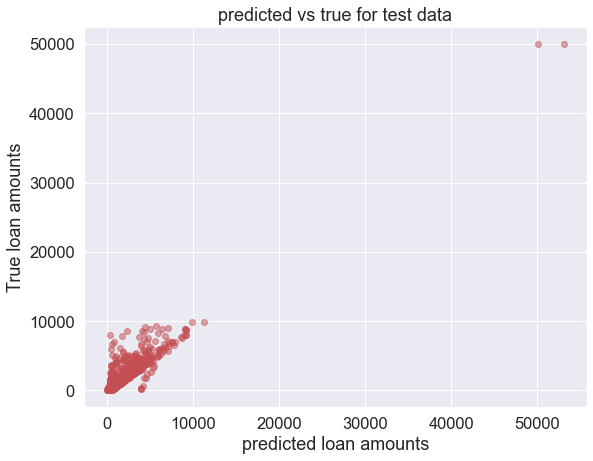

In [45]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted loan amounts')
plt.ylabel('True loan amounts')
plt.show();

-----
Appendix B - How to deal with skewed data
----
<a id="skewed"> </a>


One potential solution is to **log transform** your data. For a quick review of logarithms, look [here](https://www.mathsisfun.com/algebra/logarithms.html). 

Note that when we log transform data, we change our interpretation of the final regression output. Previously we had a simple linear equation... 

    y = mx + b

This could be interpreted as, with every unit increase in x, we get a m increase in outcome feature y. Now we have a log equation: 

    log(y) = mx + b
    
This is less intuitive, as we have to solve for y. When we solve for y through exponentiation, we get the following equation: 

    y = 10^(mx + b)
    y = 10^(mx) * 10^(b)

The default base for log is 10. The takeaway here is that the impact x would have on y is much larger than linear - it is **exponentiated**. We will return to this interpretation in the discussion of the linear regression model. Let's try log transforming our loan_amount variable. 

(array([5.944e+03, 6.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.0000e+01, 8.0450e+03, 1.6040e+04, 2.4035e+04, 3.2030e+04,
        4.0025e+04, 4.8020e+04, 5.6015e+04, 6.4010e+04, 7.2005e+04,
        8.0000e+04]),
 <BarContainer object of 10 artists>)

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Loan Amount')

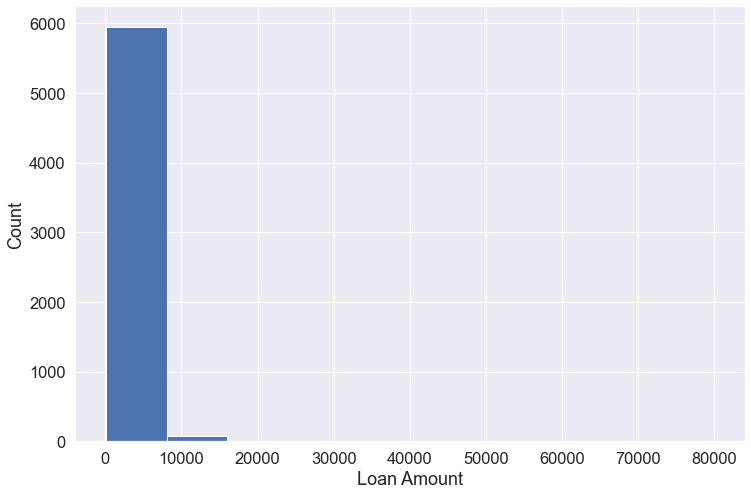

In [46]:
# Histogram of loan_amount 
plt.hist(df['loan_amount']);
plt.ylabel('Count');
plt.xlabel('Loan Amount');

(array([ 190.,  772., 1293., 1479.,  880.,  792.,  572.,   35.,    0.,
           6.]),
 array([ 3.91202301,  4.6497989 ,  5.38757479,  6.12535068,  6.86312657,
         7.60090246,  8.33867835,  9.07645424,  9.81423013, 10.55200602,
        11.28978191]),
 <BarContainer object of 10 artists>)

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Log(Loan Amount)')

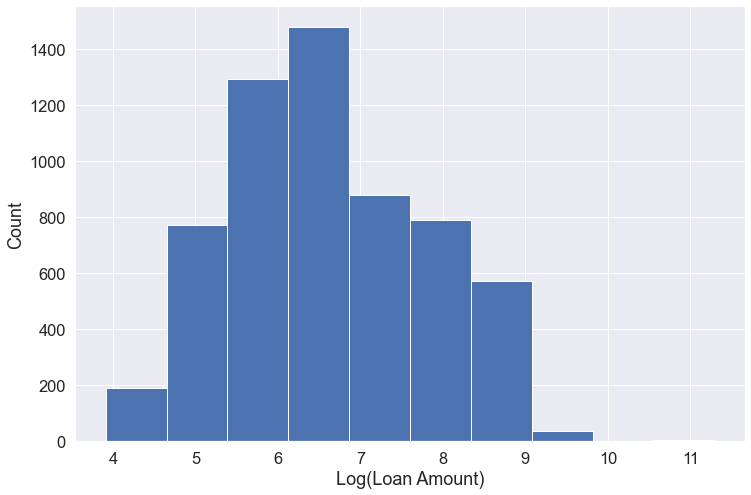

In [47]:
# Take the log of loan amount and plot histogram
log_loan_amount = np.log(df['loan_amount'])
plt.hist(log_loan_amount);
plt.ylabel('Count');
plt.xlabel('Log(Loan Amount)');

----
Appendix C - Choosing the right features
----

So we've increased our R2 by adding additional promising features from our Exploratory Data Analysis (EDA). However, how should we go about choosing the best combination of features for our model? In general there are two approachs:
- stepwise regression = Incrementally adding promising features and checking the R2 and p-valules at each step to check it is worth adding. This is the approach we used above. 
- Ridge or Lasso regression = These are methods which algorithmically reduce the beta coefficients for less important feature and can be used to find the most useful combination of features. More in depth information can be found here: [Regularization Regression](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

Let's test Lasso regression and see what we get! 

For context, Ridge and Lasso regression have a hyper-parameters called 'alpha' which determines how 'strong' the regularization affect is. 

A useful way to use Ridge or Lasso regression is to run the regression over a range of alphas and see which features maintain a large beta coefficient for the longest. It is these features which have the most predictive power!

In [48]:
# Define the dependent variable
y = df['loan_amount']
# Define the independent variables
X = df[['lender_count', 'country_ZA', 'country_ZM', 'lc_country_rw', 'sector_Education', 'sector_Clothing', 
        'sector_Personal Use', 'sector_Retail', 'sector_Transportation', 'sector_Agriculture']]
# Add an intercept term to the independent variables
X['cnst'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model6 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     2276.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:06:21   Log-Likelihood:                -40240.
No. Observations:                4815   AIC:                         8.050e+04
Df Residuals:                    4804   BIC:                         8.057e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lender_count             30.62

In [49]:
from sklearn.linear_model import Lasso

In [50]:
alphas = np.arange(0.001, 0.502, 0.002)
lasso_coefs = []
X_train_lasso= X_train[X_train.columns.tolist()] # Select columns / features for model

for a in alphas:
    lassoreg = Lasso(alpha=a, copy_X=True, normalize=True)
    lassoreg.fit(X_train_lasso, y_train)
    lasso_coefs.append(lassoreg.coef_)

Lasso(alpha=0.001, normalize=True)

Lasso(alpha=0.003, normalize=True)

Lasso(alpha=0.005, normalize=True)

Lasso(alpha=0.007, normalize=True)

Lasso(alpha=0.009000000000000001, normalize=True)

Lasso(alpha=0.011, normalize=True)

Lasso(alpha=0.013000000000000001, normalize=True)

Lasso(alpha=0.015, normalize=True)

Lasso(alpha=0.017, normalize=True)

Lasso(alpha=0.019000000000000003, normalize=True)

Lasso(alpha=0.021, normalize=True)

Lasso(alpha=0.023, normalize=True)

Lasso(alpha=0.025, normalize=True)

Lasso(alpha=0.027000000000000003, normalize=True)

Lasso(alpha=0.029, normalize=True)

Lasso(alpha=0.031, normalize=True)

Lasso(alpha=0.033, normalize=True)

Lasso(alpha=0.035, normalize=True)

Lasso(alpha=0.037000000000000005, normalize=True)

Lasso(alpha=0.039, normalize=True)

Lasso(alpha=0.041, normalize=True)

Lasso(alpha=0.043000000000000003, normalize=True)

Lasso(alpha=0.045, normalize=True)

Lasso(alpha=0.047, normalize=True)

Lasso(alpha=0.049, normalize=True)

Lasso(alpha=0.051000000000000004, normalize=True)

Lasso(alpha=0.053000000000000005, normalize=True)

Lasso(alpha=0.055, normalize=True)

Lasso(alpha=0.057, normalize=True)

Lasso(alpha=0.059000000000000004, normalize=True)

Lasso(alpha=0.061, normalize=True)

Lasso(alpha=0.063, normalize=True)

Lasso(alpha=0.065, normalize=True)

Lasso(alpha=0.067, normalize=True)

Lasso(alpha=0.069, normalize=True)

Lasso(alpha=0.07100000000000001, normalize=True)

Lasso(alpha=0.07300000000000001, normalize=True)

Lasso(alpha=0.075, normalize=True)

Lasso(alpha=0.077, normalize=True)

Lasso(alpha=0.079, normalize=True)

Lasso(alpha=0.081, normalize=True)

Lasso(alpha=0.083, normalize=True)

Lasso(alpha=0.085, normalize=True)

Lasso(alpha=0.08700000000000001, normalize=True)

Lasso(alpha=0.089, normalize=True)

Lasso(alpha=0.091, normalize=True)

Lasso(alpha=0.093, normalize=True)

Lasso(alpha=0.095, normalize=True)

Lasso(alpha=0.097, normalize=True)

Lasso(alpha=0.099, normalize=True)

Lasso(alpha=0.101, normalize=True)

Lasso(alpha=0.10300000000000001, normalize=True)

Lasso(alpha=0.10500000000000001, normalize=True)

Lasso(alpha=0.107, normalize=True)

Lasso(alpha=0.109, normalize=True)

Lasso(alpha=0.111, normalize=True)

Lasso(alpha=0.113, normalize=True)

Lasso(alpha=0.115, normalize=True)

Lasso(alpha=0.117, normalize=True)

Lasso(alpha=0.11900000000000001, normalize=True)

Lasso(alpha=0.121, normalize=True)

Lasso(alpha=0.123, normalize=True)

Lasso(alpha=0.125, normalize=True)

Lasso(alpha=0.127, normalize=True)

Lasso(alpha=0.129, normalize=True)

Lasso(alpha=0.131, normalize=True)

Lasso(alpha=0.133, normalize=True)

Lasso(alpha=0.135, normalize=True)

Lasso(alpha=0.137, normalize=True)

Lasso(alpha=0.139, normalize=True)

Lasso(alpha=0.14100000000000001, normalize=True)

Lasso(alpha=0.14300000000000002, normalize=True)

Lasso(alpha=0.14500000000000002, normalize=True)

Lasso(alpha=0.147, normalize=True)

Lasso(alpha=0.149, normalize=True)

Lasso(alpha=0.151, normalize=True)

Lasso(alpha=0.153, normalize=True)

Lasso(alpha=0.155, normalize=True)

Lasso(alpha=0.157, normalize=True)

Lasso(alpha=0.159, normalize=True)

Lasso(alpha=0.161, normalize=True)

Lasso(alpha=0.163, normalize=True)

Lasso(alpha=0.165, normalize=True)

Lasso(alpha=0.167, normalize=True)

Lasso(alpha=0.169, normalize=True)

Lasso(alpha=0.171, normalize=True)

Lasso(alpha=0.17300000000000001, normalize=True)

Lasso(alpha=0.17500000000000002, normalize=True)

Lasso(alpha=0.177, normalize=True)

Lasso(alpha=0.179, normalize=True)

Lasso(alpha=0.181, normalize=True)

Lasso(alpha=0.183, normalize=True)

Lasso(alpha=0.185, normalize=True)

Lasso(alpha=0.187, normalize=True)

Lasso(alpha=0.189, normalize=True)

Lasso(alpha=0.191, normalize=True)

Lasso(alpha=0.193, normalize=True)

Lasso(alpha=0.195, normalize=True)

Lasso(alpha=0.197, normalize=True)

Lasso(alpha=0.199, normalize=True)

Lasso(alpha=0.201, normalize=True)

Lasso(alpha=0.203, normalize=True)

Lasso(alpha=0.20500000000000002, normalize=True)

Lasso(alpha=0.20700000000000002, normalize=True)

Lasso(alpha=0.20900000000000002, normalize=True)

Lasso(alpha=0.211, normalize=True)

Lasso(alpha=0.213, normalize=True)

Lasso(alpha=0.215, normalize=True)

Lasso(alpha=0.217, normalize=True)

Lasso(alpha=0.219, normalize=True)

Lasso(alpha=0.221, normalize=True)

Lasso(alpha=0.223, normalize=True)

Lasso(alpha=0.225, normalize=True)

Lasso(alpha=0.227, normalize=True)

Lasso(alpha=0.229, normalize=True)

Lasso(alpha=0.231, normalize=True)

Lasso(alpha=0.233, normalize=True)

Lasso(alpha=0.23500000000000001, normalize=True)

Lasso(alpha=0.23700000000000002, normalize=True)

Lasso(alpha=0.23900000000000002, normalize=True)

Lasso(alpha=0.241, normalize=True)

Lasso(alpha=0.243, normalize=True)

Lasso(alpha=0.245, normalize=True)

Lasso(alpha=0.247, normalize=True)

Lasso(alpha=0.249, normalize=True)

Lasso(alpha=0.251, normalize=True)

Lasso(alpha=0.253, normalize=True)

Lasso(alpha=0.255, normalize=True)

Lasso(alpha=0.257, normalize=True)

Lasso(alpha=0.259, normalize=True)

Lasso(alpha=0.261, normalize=True)

Lasso(alpha=0.263, normalize=True)

Lasso(alpha=0.265, normalize=True)

Lasso(alpha=0.267, normalize=True)

Lasso(alpha=0.269, normalize=True)

Lasso(alpha=0.271, normalize=True)

Lasso(alpha=0.273, normalize=True)

Lasso(alpha=0.275, normalize=True)

Lasso(alpha=0.277, normalize=True)

Lasso(alpha=0.279, normalize=True)

Lasso(alpha=0.281, normalize=True)

Lasso(alpha=0.28300000000000003, normalize=True)

Lasso(alpha=0.28500000000000003, normalize=True)

Lasso(alpha=0.28700000000000003, normalize=True)

Lasso(alpha=0.28900000000000003, normalize=True)

Lasso(alpha=0.291, normalize=True)

Lasso(alpha=0.293, normalize=True)

Lasso(alpha=0.295, normalize=True)

Lasso(alpha=0.297, normalize=True)

Lasso(alpha=0.299, normalize=True)

Lasso(alpha=0.301, normalize=True)

Lasso(alpha=0.303, normalize=True)

Lasso(alpha=0.305, normalize=True)

Lasso(alpha=0.307, normalize=True)

Lasso(alpha=0.309, normalize=True)

Lasso(alpha=0.311, normalize=True)

Lasso(alpha=0.313, normalize=True)

Lasso(alpha=0.315, normalize=True)

Lasso(alpha=0.317, normalize=True)

Lasso(alpha=0.319, normalize=True)

Lasso(alpha=0.321, normalize=True)

Lasso(alpha=0.323, normalize=True)

Lasso(alpha=0.325, normalize=True)

Lasso(alpha=0.327, normalize=True)

Lasso(alpha=0.329, normalize=True)

Lasso(alpha=0.331, normalize=True)

Lasso(alpha=0.333, normalize=True)

Lasso(alpha=0.335, normalize=True)

Lasso(alpha=0.337, normalize=True)

Lasso(alpha=0.339, normalize=True)

Lasso(alpha=0.341, normalize=True)

Lasso(alpha=0.343, normalize=True)

Lasso(alpha=0.34500000000000003, normalize=True)

Lasso(alpha=0.34700000000000003, normalize=True)

Lasso(alpha=0.34900000000000003, normalize=True)

Lasso(alpha=0.35100000000000003, normalize=True)

Lasso(alpha=0.353, normalize=True)

Lasso(alpha=0.355, normalize=True)

Lasso(alpha=0.357, normalize=True)

Lasso(alpha=0.359, normalize=True)

Lasso(alpha=0.361, normalize=True)

Lasso(alpha=0.363, normalize=True)

Lasso(alpha=0.365, normalize=True)

Lasso(alpha=0.367, normalize=True)

Lasso(alpha=0.369, normalize=True)

Lasso(alpha=0.371, normalize=True)

Lasso(alpha=0.373, normalize=True)

Lasso(alpha=0.375, normalize=True)

Lasso(alpha=0.377, normalize=True)

Lasso(alpha=0.379, normalize=True)

Lasso(alpha=0.381, normalize=True)

Lasso(alpha=0.383, normalize=True)

Lasso(alpha=0.385, normalize=True)

Lasso(alpha=0.387, normalize=True)

Lasso(alpha=0.389, normalize=True)

Lasso(alpha=0.391, normalize=True)

Lasso(alpha=0.393, normalize=True)

Lasso(alpha=0.395, normalize=True)

Lasso(alpha=0.397, normalize=True)

Lasso(alpha=0.399, normalize=True)

Lasso(alpha=0.401, normalize=True)

Lasso(alpha=0.403, normalize=True)

Lasso(alpha=0.405, normalize=True)

Lasso(alpha=0.40700000000000003, normalize=True)

Lasso(alpha=0.40900000000000003, normalize=True)

Lasso(alpha=0.41100000000000003, normalize=True)

Lasso(alpha=0.41300000000000003, normalize=True)

Lasso(alpha=0.41500000000000004, normalize=True)

Lasso(alpha=0.41700000000000004, normalize=True)

Lasso(alpha=0.419, normalize=True)

Lasso(alpha=0.421, normalize=True)

Lasso(alpha=0.423, normalize=True)

Lasso(alpha=0.425, normalize=True)

Lasso(alpha=0.427, normalize=True)

Lasso(alpha=0.429, normalize=True)

Lasso(alpha=0.431, normalize=True)

Lasso(alpha=0.433, normalize=True)

Lasso(alpha=0.435, normalize=True)

Lasso(alpha=0.437, normalize=True)

Lasso(alpha=0.439, normalize=True)

Lasso(alpha=0.441, normalize=True)

Lasso(alpha=0.443, normalize=True)

Lasso(alpha=0.445, normalize=True)

Lasso(alpha=0.447, normalize=True)

Lasso(alpha=0.449, normalize=True)

Lasso(alpha=0.451, normalize=True)

Lasso(alpha=0.453, normalize=True)

Lasso(alpha=0.455, normalize=True)

Lasso(alpha=0.457, normalize=True)

Lasso(alpha=0.459, normalize=True)

Lasso(alpha=0.461, normalize=True)

Lasso(alpha=0.463, normalize=True)

Lasso(alpha=0.465, normalize=True)

Lasso(alpha=0.467, normalize=True)

Lasso(alpha=0.46900000000000003, normalize=True)

Lasso(alpha=0.47100000000000003, normalize=True)

Lasso(alpha=0.47300000000000003, normalize=True)

Lasso(alpha=0.47500000000000003, normalize=True)

Lasso(alpha=0.47700000000000004, normalize=True)

Lasso(alpha=0.47900000000000004, normalize=True)

Lasso(alpha=0.481, normalize=True)

Lasso(alpha=0.483, normalize=True)

Lasso(alpha=0.485, normalize=True)

Lasso(alpha=0.487, normalize=True)

Lasso(alpha=0.489, normalize=True)

Lasso(alpha=0.491, normalize=True)

Lasso(alpha=0.493, normalize=True)

Lasso(alpha=0.495, normalize=True)

Lasso(alpha=0.497, normalize=True)

Lasso(alpha=0.499, normalize=True)

Lasso(alpha=0.501, normalize=True)

<Figure size 1008x720 with 0 Axes>

Text(0, 0.5, 'Feature Coefficient')

Text(0.5, 0, 'Alpha Value')

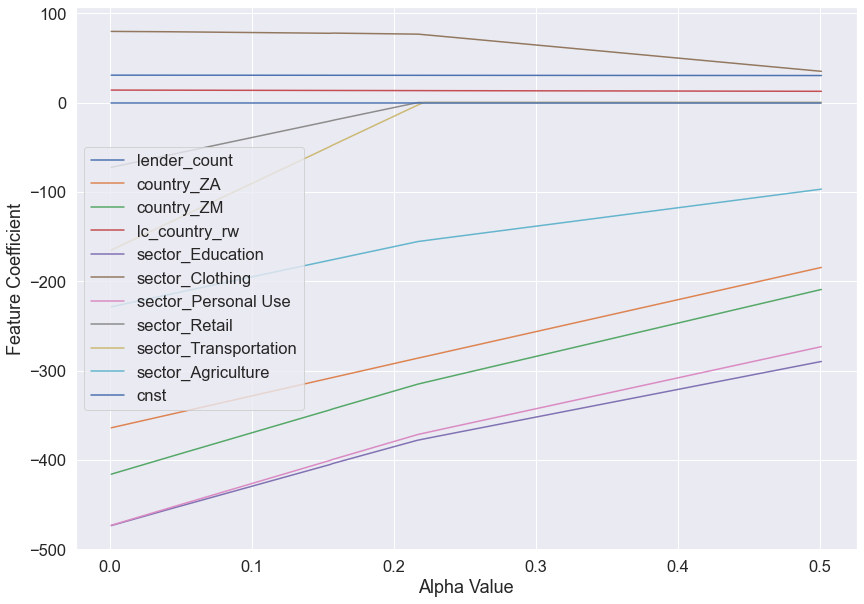

In [51]:
lasso_coefs = np.asarray(lasso_coefs).T

plt.figure(figsize=(14,10))
for coefs, feature in zip(lasso_coefs, X_train_lasso.columns):
    plt.plot(alphas, coefs, label = feature)
plt.ylabel('Feature Coefficient')
plt.xlabel('Alpha Value')
plt.legend(loc='best')
plt.show()

When alpha is approximately 0.25, the gold, green, and red lines go to 0

<br>
<br> 
<br>

----